<a href="https://colab.research.google.com/github/sanquaorg/Housing-Price-Prediction---ML-Project---CWH/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/sanquaorg/Housing-Price-Prediction---ML-Project---CWH/main/housing_data.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


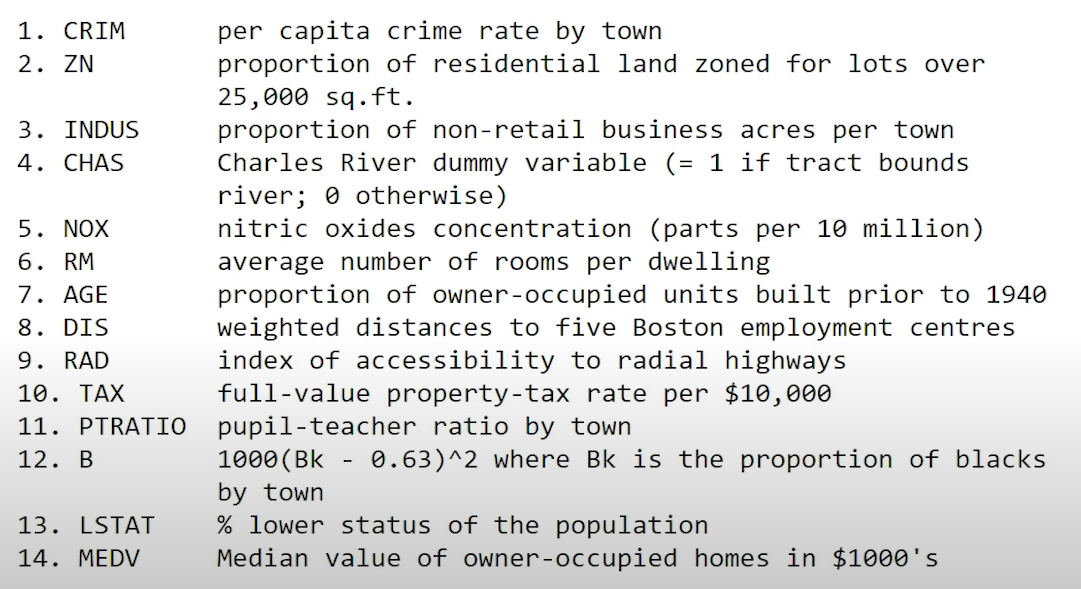

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd75d9c9370>,
      dtype=object)

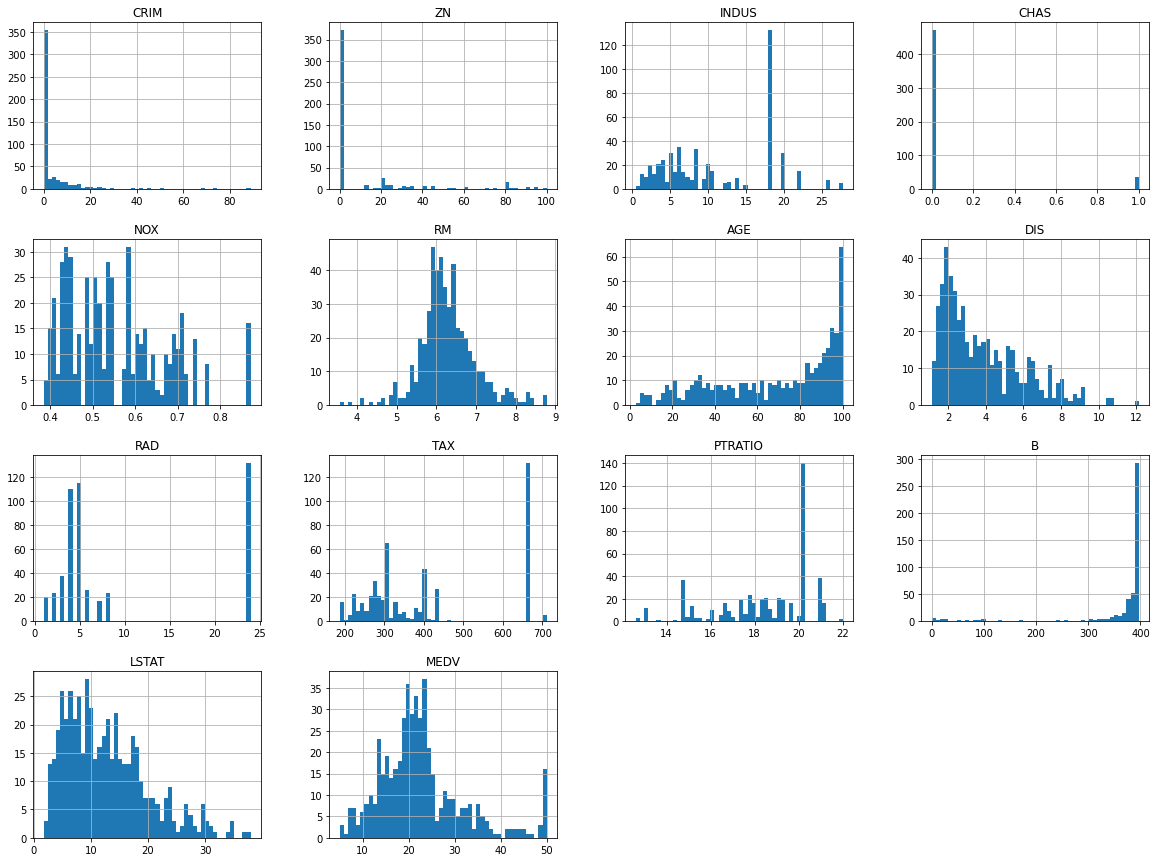

In [ ]:
df.hist(bins=50,figsize=(20,15))

In [ ]:

def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
train_set,test_set = split_train_test(df,0.2)

In [ ]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



Stratified Sampling: Every row of data that is selected for training and testing ahould represent the population.

Here, we do that for the column CHAS

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
print(strat_test_set['CHAS'].value_counts())
print(strat_train_set['CHAS'].value_counts())

0    95
1     7
Name: CHAS, dtype: int64
0    376
1     28
Name: CHAS, dtype: int64


In [ ]:
print(95/7)
print(376/28)

13.571428571428571
13.428571428571429


The % of values split is almost same

In [ ]:
df = strat_train_set.copy()

In [ ]:
df_corr=df.corr()

In [ ]:
df_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd75cd6e5b0>,
      dtype=object)

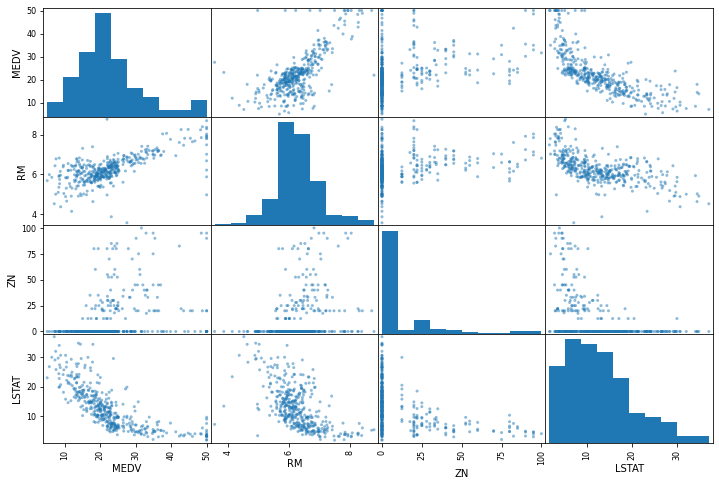

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(df[attributes],figsize=(12,8))

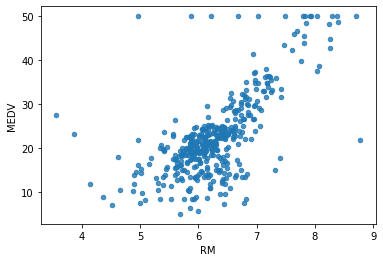

In [ ]:
df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8) #USED TO DETECT OUTLIERS AND REMOVE THEM

In [ ]:
df=strat_train_set.drop("MEDV",axis=1)
df_labels = strat_train_set["MEDV"].copy()

# The Design of SCIKIT-LEARN 

Primarily three types of objects:

1)Estimators - It estimates some parameter based on a dataset. Eg: Imputer.
It has a fit method and transform method. Fit fits the dataset and calculates the internal parameters 

2)Transformers - Takes input and returns output based on learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3)Predictors - Linear Regression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the model's prediction.

#Feature Scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy="median")),
    ('std-scaler', StandardScaler())
])

In [ ]:
imputer = SimpleImputer(strategy = "median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [ ]:
X = imputer.transform(df)
df_tr = pd.DataFrame(X,columns=df.columns)

In [ ]:
df_num_tr = my_pipeline.fit_transform(df)
df_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(df_num_tr,df_labels)

LinearRegression()

In [ ]:
some_data = df.iloc[:5]
some_lables = df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [ ]:
from sklearn.metrics import mean_squared_error
df_pred = model.predict(df_num_tr)
lin_mse = mean_squared_error(df_labels,df_pred)
lin_rmse = np.sqrt(lin_mse)


In [ ]:
lin_mse

23.32234607923367